In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#read data
url_download_barton = 'https://docs.google.com/spreadsheets/d/14Mv-sjV11S3HSy_TzdUefWglVw4anyczpWllNfTwGls/gviz/tq?tqx=out:csv'
barton_data = pd.read_csv(url_download_barton)
barton_data

,Sample Date,PFBA (ppt),PFPeA (ppt),PFBS (ppt),PFHxA (ppt),PFHpA (ppt),PFHxS (ppt),PFOA (ppt),PFNA (ppt),PFOS (ppt),6:2 FTS (ppt),Sum of PFOS and PFOA (ppt),Sum of All PFAS (ppt)
0,04/19/23,Not measured,NaN,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not measured,0,0.0
1,04/05/23,Not detected,2.9,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not detected,0,2.9
2,03/21/23,Not detected,3.2,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not detected,0,3.2
3,03/07/23,Not detected,5.1,Not detected,2.6,2.5,Not detected,Not detected,Not detected,Not detected,Not detected,0,10.2
4,02/01/23,5.2,6.1,Not detected,3.8,4.7,Not detected,Not detected,Not detected,Not detected,2.2,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,11/08/16,Not measured,NaN,Not measured,Not measured,NaN,Not measured,Not detected,Not measured,8.1,Not measured,8.1,8.1
143,10/05/16,Not measured,NaN,5.3,Not measured,4.8,Not detected,Not detected,Not detected,7.1,Not measured,7.1,17.2
144,07/21/16,Not measured,NaN,9.2,Not measured,5.3,Not detected,3,Not detected,16,Not measured,19.0,33.5
145,03/28/16,Not measured,NaN,Not detected,Not measured,2.1,Not detected,Not detected,Not detected,11,Not measured,11.0,13.1


In [17]:
#look at what data is available
barton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sample ID             1389 non-null   object        
 1   Location description  1389 non-null   object        
 2   Collection Date/Time  1389 non-null   datetime64[ns]
 3   !OBS_BARTON_PND       217 non-null    object        
 4   AMMONIA               252 non-null    object        
 5   COND_FIELD            1207 non-null   float64       
 6   DO_FIELD              1214 non-null   float64       
 7   DPTH_MSRMNT_TKN       470 non-null    object        
 8   ECOLI_MPN             245 non-null    float64       
 9   ENTERO_MPN            197 non-null    float64       
 10  NITRATE               1389 non-null   float64       
 11  NITRITE PH            217 non-null    float64       
 12  PH_FIELD              1182 non-null   float64       
 13  PHOS_META         

In [18]:
#want collection date/time to be datetime objects
barton_data['Collection Date/Time'] = pd.to_datetime(barton_data['Collection Date/Time'])
#check the data again
barton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sample ID             1389 non-null   object        
 1   Location description  1389 non-null   object        
 2   Collection Date/Time  1389 non-null   datetime64[ns]
 3   !OBS_BARTON_PND       217 non-null    object        
 4   AMMONIA               252 non-null    object        
 5   COND_FIELD            1207 non-null   float64       
 6   DO_FIELD              1214 non-null   float64       
 7   DPTH_MSRMNT_TKN       470 non-null    object        
 8   ECOLI_MPN             245 non-null    float64       
 9   ENTERO_MPN            197 non-null    float64       
 10  NITRATE               1389 non-null   float64       
 11  NITRITE PH            217 non-null    float64       
 12  PH_FIELD              1182 non-null   float64       
 13  PHOS_META         

Exploration 1: See if there is a relationship between Conductivity measurements and the time of the year and see how often conductivity levels are unhealthy. Conductivity is higher during warmer weather, so we will see if this is the case in the data.

In [20]:
#want to get the conductivity by month

#get months from the dates
barton_data['Month'] = barton_data['Collection Date/Time'].dt.month
#check the data
barton_data['Month']

0       9
1       4
2       4
3       4
4       5
       ..
1384    9
1385    9
1386    9
1387    9
1388    9
Name: Month, Length: 1389, dtype: int64

In [6]:
#look at the traits of the conductivity data
barton_data['COND_FIELD'].describe()

count    1207.000000
mean      752.690597
std        96.200022
min         6.980000
25%       730.500000
50%       766.000000
75%       790.000000
max       878.000000
Name: COND_FIELD, dtype: float64

In [21]:
#get the average conductivity by month
conductivity_by_month = barton_data.groupby('Month')['COND_FIELD'].mean()
#show data
conductivity_by_month

Month
4    747.035985
5    709.638690
6    768.136942
7    761.142857
8    748.588824
9    767.900084
Name: COND_FIELD, dtype: float64

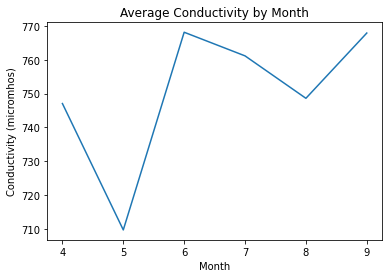

In [22]:
#plot conductivities
#data only holds dat for April-September
plt.title('Average Conductivity by Month')
plt.xlabel('Month')
plt.ylabel('Conductivity (micromhos)')
plt.plot(conductivity_by_month)
plt.show()

In [23]:
#want to find how many times conductivity is ever outside healthy amounts
#becomes unhealthy over 800 or under 100 micromhos

#find and store values outside of the healthy range
cond_unhealthy = barton_data[(barton_data['COND_FIELD'] > 800) | (barton_data['COND_FIELD'] < 100)]
#find and print how many times this occurs
print('The data has unhealthy conductivity levels', len(cond_unhealthy), 'time(s).')

The data has unhealthy conductivity levels 223 time(s).


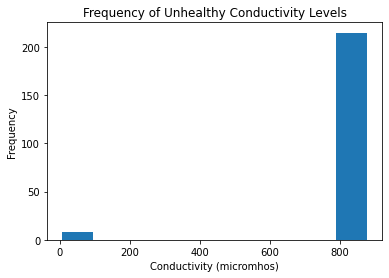

In [24]:
#plot how frequently each unhealthy value occurs in a histogram
plt.title('Frequency of Unhealthy Conductivity Levels')
plt.xlabel('Conductivity (micromhos)')
plt.ylabel('Frequency')
plt.hist(cond_unhealthy['COND_FIELD'])
plt.show()

Explanation: I loaded in the Barton Pond data and converted the collection times - found in the column 'Collection Date/Time' - to datetime objects in order to group the data by dates when needed. I wanted to get the average conductivity per months of the year, so I grouped the conductivity data - found in column 'COND_FIELD' - by month. I wanted to see the data per month regardless of year, so I only grouped by month. Using the DataFrame.describe() function, I saw that only months 4-9, or April-September, were collected. This is likely due to the pond being frozen or otherwise gives unusable data during the other months of the year. I found the mean per month for the present months and used a line plot to visualize the values.

The plot shows a very low average conductivity during May with a value around 710 micromhos, and higher averages during June and September, with values around 770 micromhos. There does not seem to be a discernable relationship between the time of the year and the conductivity level, but all the monthly averages are within healthy levels 100-800 micromhos, which shows that the conductivity levels will likely sypically stay within healthy amounts and that the averages do not raise any concerns. The average conductivity does seem to be higher during June-September than April-May , which supports the fact that conductivity is typically higher during warmer months. Data from the rest of the months would need to be collected in order to see more about this relationship, as only 5 months are shown, so there is less data to visualize and analyze.

I then looked at how many times in total the conductivity levels were outside healthy amounts, as in less than 100 or more than 800 micromhos. The Barton Pond data shows a conductivity level outside of 100-800 micromhos 223 times. This is a large amount, so it raises concerns about unhealthy conductivity levels that were not visible in the monthly averages. Experts may want to take action to normalize these values. After visualizing the amount of times the conductivity is outisde of healthy levels, there are much more values higher than 800 micromhos than values less than 100 micromhos, so experts would want to put more resources towards lowering high conductivity values, especially since there were relatively very few too-low conductivity values.

Exploration 2: See if there are concerning nitrate levels. Nitrate concentration at or above 1-2 mg/L can threaten aquatic life, so we will check if any nitrate levels in the data exceed 1 mg/L. We will also graph the frequency that each amount of nitrate occurs in the data to see if experts should be concerned about controlling nitrate levels.

In [11]:
#look at the traits of the nitrate data
barton_data['NITRATE'].describe()

count    252.000000
mean       0.364683
std        0.203512
min        0.100000
25%        0.200000
50%        0.300000
75%        0.400000
max        1.900000
Name: NITRATE, dtype: float64

In [28]:
#want to find how many times the nitrate levels exceed safe amounts

#convert nitrate levels to floats
barton_data['NITRATE'] = barton_data['NITRATE'].transform(lambda x: x.astype(float))
#show the data
barton_data['NITRATE']

0       0.0
1       0.4
2       0.4
3       0.5
4       0.5
       ... 
1384    0.0
1385    0.0
1386    0.0
1387    0.0
1388    0.0
Name: NITRATE, Length: 1389, dtype: float64

In [35]:
#change any NaN nitrate values to 0
barton_data['NITRATE'] = barton_data['NITRATE'].dropna()
#double check this
barton_data['NITRATE']

0       0.0
1       0.4
2       0.4
3       0.5
4       0.5
       ... 
1384    0.0
1385    0.0
1386    0.0
1387    0.0
1388    0.0
Name: NITRATE, Length: 1389, dtype: float64

In [36]:
#find the number of times the nitrate levels are dangerous
#becomes dangerous aroung 1-2 mg/L, so check for values greater than 1 mg/L
danger_level = 1.0
high_nitrate = barton_data[barton_data['NITRATE'] >= danger_level]
num_high_nitrate = len(high_nitrate)
print('The number of times the nitrate levels are above 1 mg/L is', num_high_nitrate, '.')

The number of times the nitrate levels are above 1 mg/L is 3 .


In [37]:
#check for values greater than 2mg/L, which would be very dangerous
danger_level2 = 2.0
higher_nitrate = barton_data[barton_data['NITRATE'] >= danger_level2]
num_higher_nitrate = len(higher_nitrate)
print('The number of times the nitrate levels are above 2 mg/L is', num_higher_nitrate, '.')

The number of times the nitrate levels are above 2 mg/L is 0 .


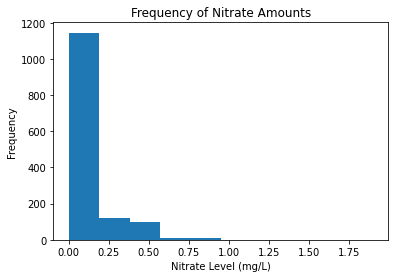

In [38]:
#plot frequencies that each level of nitrate occurs
plt.title('Frequency of Nitrate Amounts')
plt.xlabel('Nitrate Level (mg/L)')
plt.ylabel('Frequency')
plt.hist(barton_data['NITRATE'])
plt.show()

Explanation: I wanted to look at nitrate levels in the Barton Pond data and see if there consistently was a concerning amount of nitrate present. I began by converting the nitrate values - found in column 'NITRATE' - to float types so that I could plot them and compare them to the value that is designated as dangerous. I saw that there were many NaN values present, which likely meant that the nitrate values were not recorded for that observation, so I removed them. Then, I found the number of times that high levels of nitrate were present in the data set, which was 3. This is a small amount, so experts likely do not need to be worried about nitrate levels in Barton Pond. I also found that 0 observations reported a nitrate of 2 mg/L or more. Finally, I used a histogram to visualize how often each nitrate level appeared in the data. Again, it showed mostly safe levels of nitrate. As seen from the histogram and the maximum nitrate value found using the DataFrame.describe() function, no values exceed 2 mg/L, so experts do not need to worry about the nitrate levels in Barton Pond and resources can safely be utilized elsewhere.